In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('IRIS.csv')

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# observations:
# there are a mix of numeric and category columns.
# there are missing values
# label column is sepal length

In [9]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [10]:
df.shape

(150, 5)

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
# include one for each column:
df.sepal_length.value_counts()

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal_length, dtype: int64

In [14]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

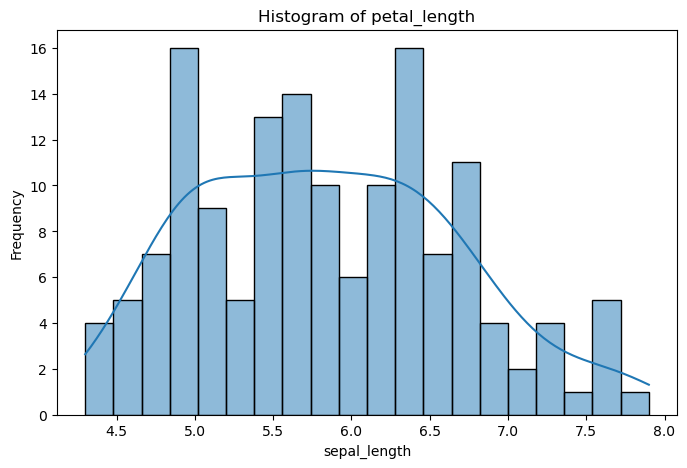

In [15]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['sepal_length'], bins=20, kde=True)
plt.title('Histogram of petal_length')
plt.xlabel('sepal_length')
plt.ylabel('Frequency')
plt.show()

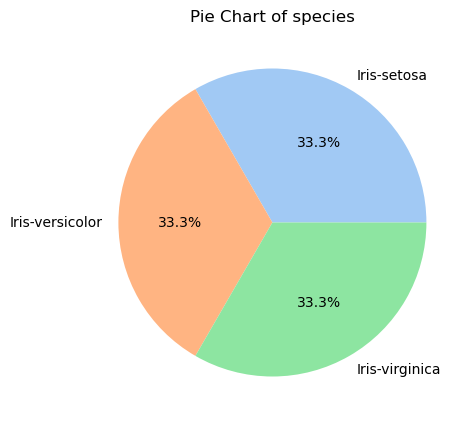

In [16]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['species'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of species')
plt.ylabel('')
plt.show()

<Axes: xlabel='sepal_length', ylabel='species'>

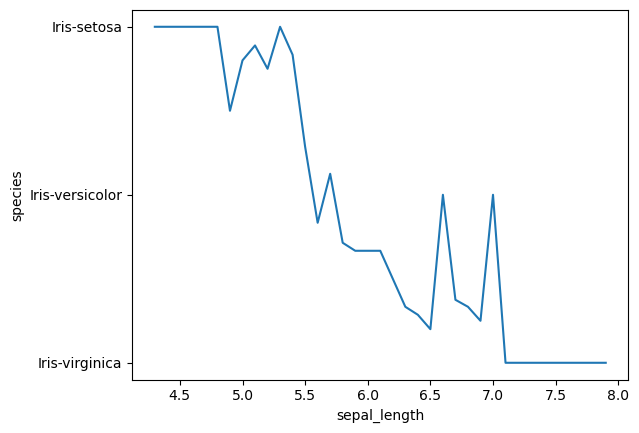

In [17]:
# Bivariate Line Plot
sns.lineplot(y='species', x='sepal_length', data=df, errorbar=None)

In [18]:
#observation the above grapf will ell you about the length of species and sepal length

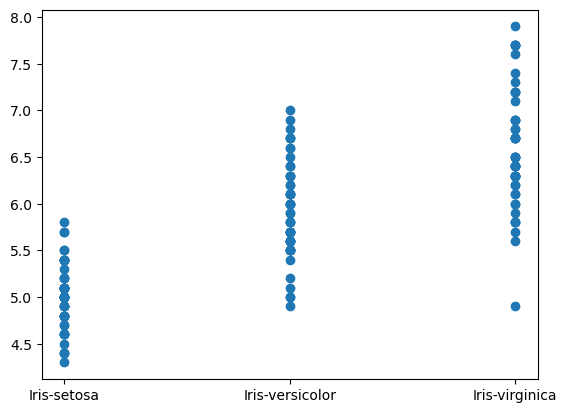

In [19]:
plt.scatter(x='species', y='sepal_length', data=df)

In [20]:
#observation this scatter plot will tell you about the range of sepal lenth with respect to the species.

<Axes: xlabel='species', ylabel='sepal_length'>

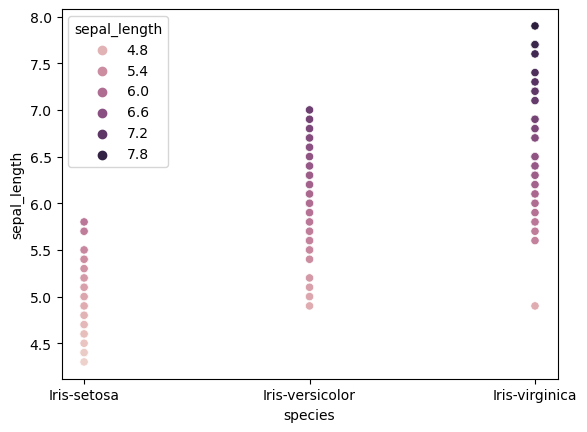

In [21]:
sns.scatterplot(x='species', y='sepal_length',hue='sepal_length', data=df)

In [22]:
#observation this is the same scatter plot as the above one but the difference is this graph shows the range of sepal_lenth with to colours

In [23]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6);

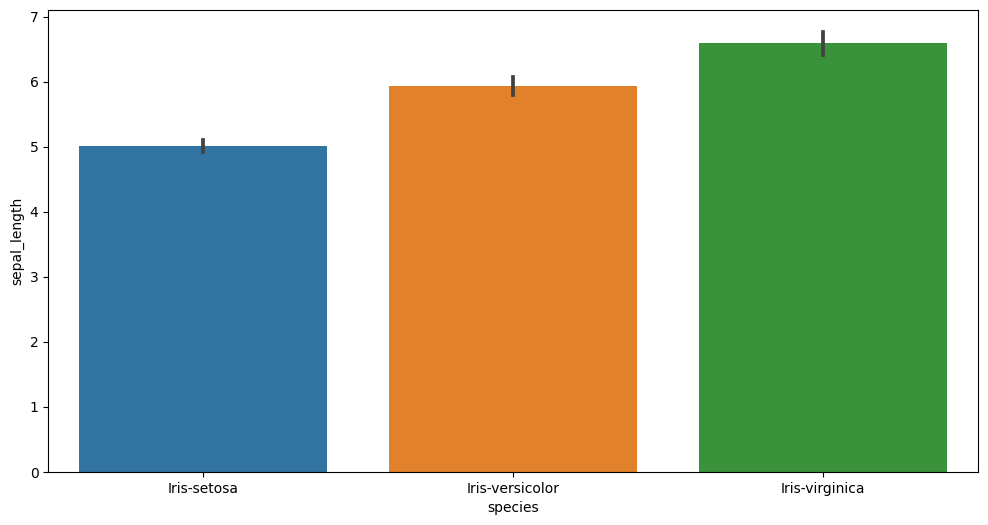

In [24]:
sns.barplot(x='species',y='sepal_length',data=df);

In [25]:
#this is the graph plot shows the species with sepal_length

# preprocess

In [26]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
df.shape

(150, 5)

In [28]:
#there is no null or missing values.
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [29]:
# Step 3: Split numeric columns into X
df_num = df.select_dtypes(include='number')
df_num.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Axes: xlabel='sepal_length'>

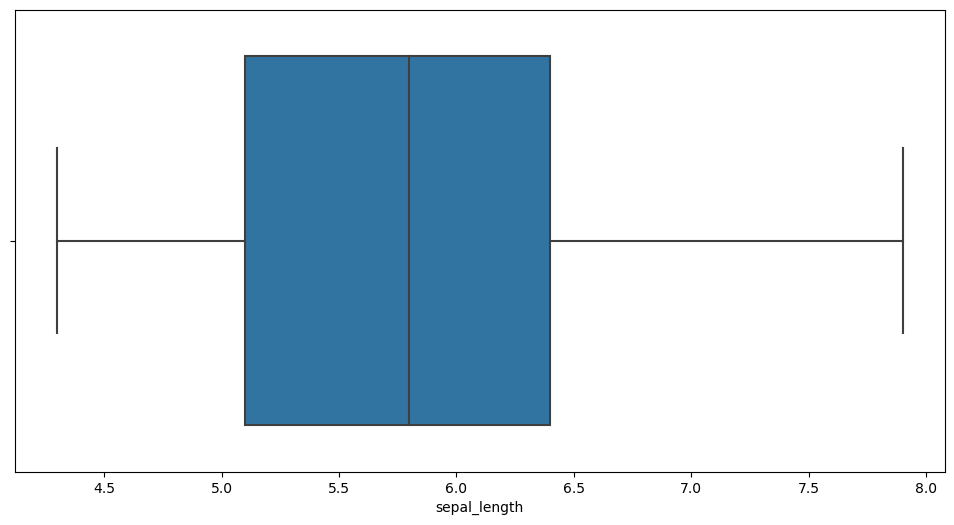

In [30]:
sns.boxplot(x=df['sepal_length'])

<Axes: xlabel='petal_length'>

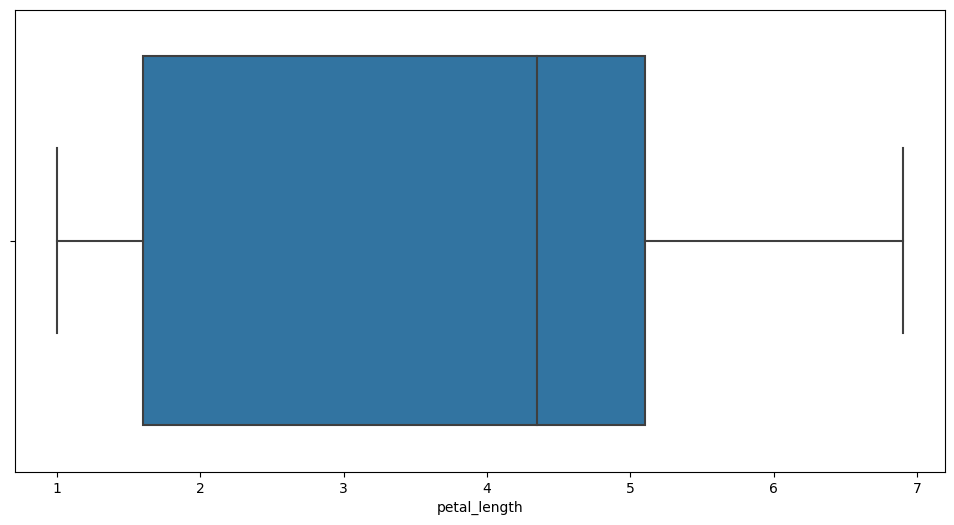

In [31]:
sns.boxplot(x=df['petal_length'])

In [32]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [33]:
label_encoder = LabelEncoder()

In [34]:
# Fit and transform the data
df["species"] = label_encoder.fit_transform(df["species"])

In [35]:
# Fit and transform the data
df["species"] = label_encoder.fit_transform(df["species"])

In [36]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [37]:
X = df.drop('species', axis=1)
y = df.species
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [115]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X)

In [116]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [117]:
 df.shape, X.shape, y.shape

((150, 5), (150, 4), (150,))

In [118]:
#Here you are giveing test and train value to the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21)

In [119]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
model= KNeighborsClassifier()

In [122]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [123]:
model.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 2, 0], dtype=int64)

In [124]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [125]:
K = 1
model = KNeighborsRegressor(n_neighbors = K)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_train) #make prediction on test set
errort1 = mean_absolute_percentage_error(y_train,pred) #calculate rmse
print('RMSE value for k= ' , K , 'is:', errort1)

RMSE value for k=  1 is: 0.0


In [126]:
# set K = 3
K = 3
model = KNeighborsRegressor(n_neighbors = K)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_train) #make prediction on test set
errort3 = mean_absolute_percentage_error(y_train,pred) #calculate rmse
print('RMSE value for k= ' , K , 'is:', errort3)

RMSE value for k=  3 is: 0.018518518518518517


In [127]:
# set K=5
K = 5
model = KNeighborsRegressor(n_neighbors = K)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_train) #make prediction on test set
errort5 = mean_absolute_percentage_error(y_train,pred) #calculate rmse
print('RMSE value for k= ' , K , 'is:', errort5)

RMSE value for k=  5 is: 0.027777777777777776


In [129]:
# set K = 1
K = 1
model = KNeighborsRegressor(n_neighbors = K)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
errork1 = mean_absolute_percentage_error(y_test,pred) #calculate rmse
print('RMSE value for k= ' , K , 'is:', errork1)

RMSE value for k=  1 is: 0.03333333333333333


In [130]:
K = 3
model = KNeighborsRegressor(n_neighbors = K)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
errork3 = mean_absolute_percentage_error(y_test,pred) #calculate rmse
print('RMSE value for k= ' , K , 'is:', errork3)

RMSE value for k=  3 is: 0.05


In [131]:
# set K=5
K = 5
model = KNeighborsRegressor(n_neighbors = K)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
errork5 = mean_absolute_percentage_error(y_test,pred) #calculate rmse
print('RMSE value for k= ' , K , 'is:', errork5)

RMSE value for k=  5 is: 0.05333333333333334


In [132]:
k_values = list(range(1,10,2))
train_mape_scores = []
test_mape_scores = []
from sklearn.neighbors import KNeighborsClassifier

In [143]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)

In [144]:
train_mape_scores

[0.0,
 0.013888888888888888,
 0.018518518518518517,
 0.02638888888888889,
 0.027777777777777776,
 0.025925925925925932,
 0.027777777777777776,
 0.03194444444444444,
 0.03209876543209877,
 0.0,
 0.013888888888888888,
 0.018518518518518517,
 0.02638888888888889,
 0.027777777777777776,
 0.025925925925925932,
 0.027777777777777776,
 0.03194444444444444,
 0.03209876543209877]

In [135]:
test_mape_scores

[0.03333333333333333,
 0.05,
 0.05333333333333334,
 0.06547619047619047,
 0.07037037037037039]

In [153]:
# Train the model with different K values and calculate MAPE scores using CV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt

k_values = np.arange(1, 20,)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

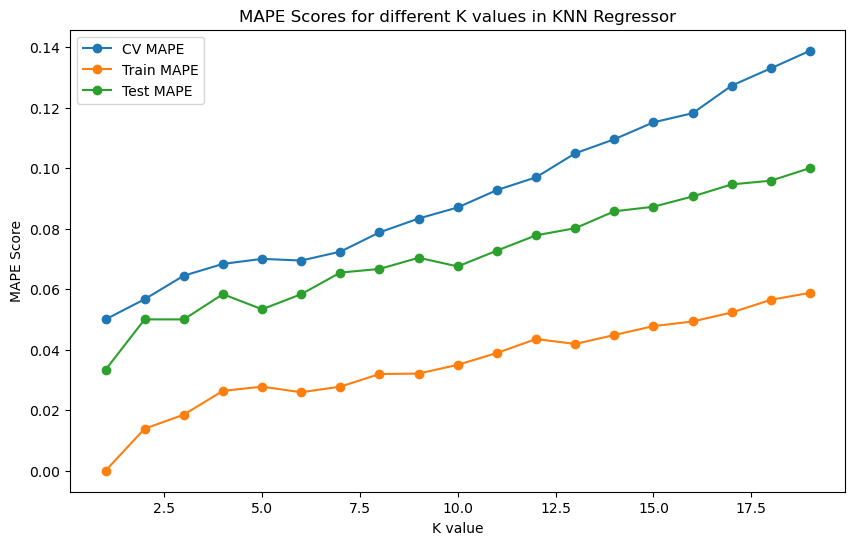

The best K value for CV is 1.


In [154]:
# Plot CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")